# Deep Learning notebook


<img src="https://www.tensorflow.org/site-assets/images/marketing/home/model.svg">

<sub>*Photo credit: TensorFlow*<sub>  

Prof. Dr. Jan Kirenz  
HdM Stuttgart

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

[![Intro to Machine Learning](https://img.youtube.com/vi/KNAWp2S3w94/0.jpg)](https://www.youtube.com/watch?v=KNAWp2S3w94 "Intro to Machine Learning")  
*This tutorial is based on Lawrence Moroney's excellent video tutorial [Intro to Machine Learning](https://www.youtube.com/watch?v=KNAWp2S3w94).*

- First of all, we create some data in Python. 
- In particular, we create two variables *x* and *y* with 6 values respectively. 

A Python library called **NumPy** provides lots of array type data structures to do this. 

1. Import the library ``numpy`` as ``np`` and 
2. specify the values for *x* and *y* as an array in NumPy with ``np.array[]``. We use datatype *float*.

In [1]:
# Create some data
import numpy as np

x = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
y = np.array([-2.0, 1.0, 4.0, 7.0, 10.0, 13.0], dtype=float)

Now let's take a look at the numbers.  
Can you see the relationship between them?


| Variable   | Value 1   | Value 2   | Value 3   | Value 4   | Value 5   | Value 6  |
|---|---|---|---|---|---|---|
| x | -1 | 0 | 1 | 2 | 3 | 4 |
| y | -2 | 1 | 4 | 7 | 10 | 13 |

As you look at them, you might notice that the value of x is increasing by 1 as you read left to right and the corresponding value of y is increasing by 3. 
You probably think that y equals 3 times x plus or minus something. Then, you'd probably look at the 0 on x and see that y is 1, and you'd come up with the relationship: 

$y = 3x + 1.$

That's almost exactly how you would use code to train a model to spot the patterns in the data! How would you train a neural network to do the equivalent task? By feeding it with your set of x's and y's, it should be able to figure out the relationship between them.

But before we train our model, let`s first use the Python library **seaborn** to visualize the realtionship between x and y.

y = 3x + 1


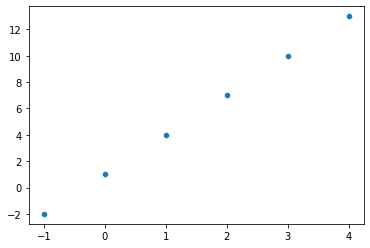

In [2]:
# Plot relationship with scatterplot
import seaborn as sns

sns.scatterplot(x=x,y=y);

print("y = 3x + 1")


# Neural Network

- We import **TensorFlow** and calling it ``tf`` for ease of use. 
- The framework for defining a neural network as a set of sequential layers is called ``keras``, so import that, too.

In [3]:
# Import TensorFlow and Keras 

import tensorflow as tf
from tensorflow import keras

ModuleNotFoundError: No module named 'tensorflow'

## Define and compile the neural network

First, we create the simplest possible neural network:

- it has one layer (``keras.layers.Dense()``), 
- that layer has one neuron (``units=1``), 
- and the input shape to it is only one value (``input_shape=[1]``).

In [5]:
# Define neural network

model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

2022-03-05 13:16:23.316110: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


- Next, we write the code to ``compile`` your neural network. 
- When you do so, you need to specify two functions:  

  - an ``optimizer`` and
  - a ``loss`` function.


- We use **mean_squared_error** for the loss and **stochastic gradient descent (sgd)** for the optimizer.   
- You don't need to understand the math for those yet, but you can see that they work!

In [6]:
# Compile neural network

model.compile(optimizer='sgd', loss='mean_squared_error')

In this example, you know that the relationship between the numbers is $y=3x+1$. 

1. When the computer is trying to learn that, it makes a guess, maybe $y=10x+10$. 
2. The **loss** function measures the guessed answers against the known correct answers and measures how well or badly it did.
3. Next, the model uses the **optimizer** function to make another guess. 
4. Based on the **loss** function's result, it tries to minimize the loss. At this point, maybe it will come up with something like $y=5x+5$. While that's still pretty bad, it's closer to the correct result (the loss is lower).
5. The model repeats that for the number of **epochs**, which you'll see shortly.

Now you have all the code you need to define the neural network. The next step is to train it to see if it can infer the patterns between those numbers and use them to create a model.

## Train the neural network

The process of training the neural network, where it learns the relationship between the x's and y's, is in the ``model.fit`` call. That's where it will go through the loop before making a guess, measuring how good or bad it is (the loss), or using the optimizer to make another guess. It will do that for the number of **epochs** that you specify. 

When you run that code, you'll see the loss will be printed out for each epoch. 

For example, you can see that for the first few epochs, the loss value is quite large, but it's getting smaller with each step. As the training progresses, the loss soon gets very small.
By the time the training is done, the loss is extremely small, showing that our model is doing a great job of inferring the relationship between the numbers.


In [7]:
# Train neural network

model.fit(x, y, epochs=50)

Epoch 1/50
1/1 [==============================] - 0s 168ms/step - loss: 40.4891
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 31.8584
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 25.0681
Epoch 4/50
1/1 [==============================] - 0s 2ms/step - loss: 19.7257
Epoch 5/50
1/1 [==============================] - 0s 2ms/step - loss: 15.5225
Epoch 6/50
1/1 [==============================] - 0s 2ms/step - loss: 12.2156
Epoch 7/50
1/1 [==============================] - 0s 2ms/step - loss: 9.6138
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 7.5668
Epoch 9/50
1/1 [==============================] - 0s 2ms/step - loss: 5.9562
Epoch 10/50
1/1 [==============================] - 0s 2ms/step - loss: 4.6890
Epoch 11/50
1/1 [==============================] - 0s 2ms/step - loss: 3.6920
Epoch 12/50
1/1 [==============================] - 0s 2ms/step - loss: 2.9075
Epoch 13/50
1/1 [==============================] - 0s 2ms/step - 

## Use the model

You now have a model that has been trained to learn the relationship between x and y. You can use the ``model.predict`` method to have it figure out the y for a previously unknown x. 

For example, if x is 10, what do you think y will be? Take a guess before you run the following code:

In [8]:
# Make a prediction

print(model.predict([10.0]))

[[31.170954]]


You might have thought 31, but it ended up not exactly there.  Why do you think that is?

Neural networks deal with probabilities, so it calculated that there is a very high probability that the relationship between x and y is $y=3x+1$, but it can't know for sure with only six data points. Therefore, the result is very close to 31, but not necessarily 31.

As you work with neural networks, you'll see that pattern recurring. You will almost always deal with probabilities, not certainties, and will do a little bit of coding to figure out what the result is based on the probabilities.

---

In [9]:
# Summary

# Import modules
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Data
x = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
y = np.array([-2.0, 1.0, 4.0, 7.0, 10.0, 13.0], dtype=float)

# Model definition
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

# Model fitting
model.fit(x, y, epochs=50, verbose=0)

# Model prediction
print(model.predict([10.0]))

[[31.005653]]
